<a href="https://colab.research.google.com/github/Sameer-Ahmed7/Deep_learning_Practice/blob/BMI/BodyMassIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install tensorflow --upgrade

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se

In [0]:
df = pd.read_csv("/content/500_Person_Gender_Height_Weight_Index.csv")

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [0]:
male = df[df["Gender"] == "Male"]

In [8]:
male

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
...,...,...,...,...
487,Male,187,80,2
488,Male,198,136,4
494,Male,152,98,5
498,Male,150,95,5


In [0]:
female = df[df["Gender"]=="Female"]

In [10]:
female

,Gender,Height,Weight,Index
2,Female,185,110,4
3,Female,195,104,3
9,Female,169,103,4
11,Female,159,80,4
12,Female,192,101,3
...,...,...,...,...
492,Female,198,50,0
493,Female,170,53,1
495,Female,150,153,5
496,Female,184,121,4


In [11]:
'''fig1 = plt.figure()
lab = ['Man', 'Female']
gender = [male.Gender.count(),female.Gender.count()]
plt.bar(lab,gender,align='center',color=('red','blue'),label=("S","Y"))
plt.title("Male vs Female")
plt.xlabel("Gender")
plt.ylabel("Range")
plt.legend()
plt.show()'''

'fig1 = plt.figure()\nlab = [\'Man\', \'Female\']\ngender = [male.Gender.count(),female.Gender.count()]\nplt.bar(lab,gender,align=\'center\',color=(\'red\',\'blue\'),label=("S","Y"))\nplt.title("Male vs Female")\nplt.xlabel("Gender")\nplt.ylabel("Range")\nplt.legend()\nplt.show()'

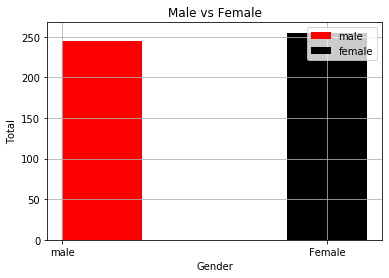

In [12]:
plt.bar("male",male.Gender.count(),width=0.3,color="red",label="male",align="edge")
plt.bar("Female",female.Gender.count(),width=0.3,color="black",label="female")
#plt.bar(lab,gender,align='center',color=('red','blue'),label=("S","Y"))
plt.title("Male vs Female")
plt.xlabel("Gender")
plt.ylabel("Total")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [13]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


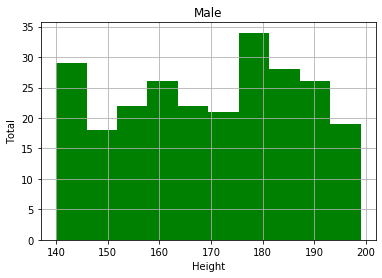

In [14]:
#plt.plot(male.Index,male.Height,color="red",label="male",ls="--",marker="o")
#plt.plot(female.Index,female.Height,color="black",label="female")
#plt.bar(lab,gender,align='center',color=('red','blue'),label=("S","Y"))
plt.hist(male.Height,color="green")
plt.title("Male")
plt.xlabel("Height")
plt.ylabel("Total")
plt.grid(True)
plt.show()

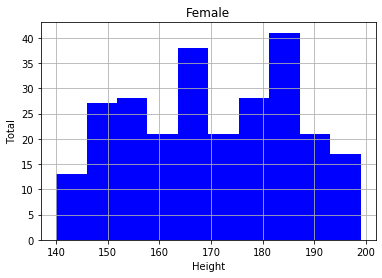

In [15]:
plt.hist(female.Height,color="blue")
plt.title("Female")
plt.xlabel("Height")
plt.ylabel("Total")
plt.grid(True)
plt.show()

In [16]:
df.head(4)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3


# Male and Female Convert to dummy variables

In [0]:
dummy = pd.get_dummies(df.Gender)

In [18]:
dummy.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [0]:
df = pd.concat([dummy,df],axis=1)

In [0]:
df.drop("Gender",inplace=True,axis=1)

In [21]:
df.head()

,Female,Male,Height,Weight,Index
0,0,1,174,96,4
1,0,1,189,87,2
2,1,0,185,110,4
3,1,0,195,104,3
4,0,1,149,61,3


In [22]:
df.shape

(500, 5)

In [0]:
train_x = df.iloc[:400,:4]

In [24]:
train_x.shape

(400, 4)

In [0]:
train_y = df.iloc[:400,4]

In [0]:
test_x = df.iloc[400:,:4]
test_y = df.iloc[400:,4]

In [27]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((400, 4), (400,), (100, 4), (100,))

In [0]:
trainMandF = train_x.iloc[:,:2]

In [29]:
trainMandF

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,0,1
398,1,0


In [30]:
testMandF = test_x.iloc[:,:2]
testMandF

,Female,Male
400,1,0
401,0,1
402,0,1
403,0,1
404,0,1
...,...,...
495,1,0
496,1,0
497,1,0
498,0,1


# Normiliztion

In [0]:
mean = train_x.mean(axis=0)
train_x -= mean
std = train_x.std(axis=0)
train_x /= std
test_x -= mean
test_x /= std

In [0]:
test_x.drop(["Female","Male"],inplace=True,axis=1)

In [0]:
train_x.drop(["Female","Male"],axis=1,inplace=True)

In [0]:
train_x = pd.concat([trainMandF,train_x],axis=1)

In [0]:
test_x = pd.concat([testMandF,test_x],axis=1)

In [36]:
train_x.head(2)

,Female,Male,Height,Weight
0,0,1,0.227033,-0.287508
1,0,1,1.133955,-0.565666


In [37]:
test_x.head(2)

,Female,Male,Height,Weight
400,1,0,1.496723,-0.040256
401,0,1,0.227033,0.052464


In [38]:
test_x.shape,train_x.shape

((100, 4), (400, 4))

In [39]:
df.Index.unique()

array([4, 2, 3, 5, 1, 0])

# Create Model

In [0]:
from tensorflow.keras import models , layers

In [0]:
def buildModel():
  model = models.Sequential()
  model.add(layers.Dense(50,activation="relu"))
  model.add(layers.Dense(6,activation="softmax"))
  model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=['accuracy'])
  return model

In [0]:
from tensorflow.keras.utils import  to_categorical
train_labels = to_categorical(train_y)
test_labels = to_categorical(test_y)

In [0]:
model = buildModel()

In [0]:
train_x = train_x.values
test_x = test_x.values

# Train Model

In [45]:
model.fit(train_x,train_labels,epochs=150)

Train on 400 samples
Epoch 1/150
400/400 [==============================] - 0s 831us/sample - loss: 1.6479 - accuracy: 0.3775
Epoch 2/150
400/400 [==============================] - 0s 55us/sample - loss: 1.5226 - accuracy: 0.5600
Epoch 3/150
400/400 [==============================] - 0s 58us/sample - loss: 1.4283 - accuracy: 0.5850
Epoch 4/150
400/400 [==============================] - 0s 52us/sample - loss: 1.3473 - accuracy: 0.5800
Epoch 5/150
400/400 [==============================] - 0s 53us/sample - loss: 1.2742 - accuracy: 0.5900
Epoch 6/150
400/400 [==============================] - 0s 54us/sample - loss: 1.2117 - accuracy: 0.5875
Epoch 7/150
400/400 [==============================] - 0s 57us/sample - loss: 1.1572 - accuracy: 0.5850
Epoch 8/150
400/400 [==============================] - 0s 61us/sample - loss: 1.1078 - accuracy: 0.5950
Epoch 9/150
400/400 [==============================] - 0s 61us/sample - loss: 1.0635 - accuracy: 0.5925
Epoch 10/150
400/400 [====================

# Save Model

In [0]:
model.save("model.h5")

# Load Model

In [47]:
import tensorflow
model = tensorflow.keras.models.load_model("model.h5")

In [0]:
#test_loss, test_acc = model.evaluate(test_x,test_labels)

In [0]:
#print("Test loss : ",test_loss)
#print("Test Accuracy: ",test_acc)

In [50]:
test_y

400    3
401    4
402    2
403    4
404    4
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 100, dtype: int64

In [51]:
test_labels

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0.

In [0]:
pred = model.predict(test_x)

In [0]:
predic = []
for i in range(len(pred)):
  predic.append(pred[i].argmax())

In [0]:
predic = np.array(predic)

In [55]:
predic[0]

3

In [0]:
import csv
with open("Test_Data.csv",'w+') as f:
  w = csv.writer(f,delimiter=",")
  w.writerow(["BMI"])
  for i in range(len(predic)):
    w.writerow([predic[i]])

In [0]:
df1 = pd.read_csv("Test_Data.csv")

In [58]:
df1

,BMI
0,3
1,4
2,2
3,4
4,4
...,...
95,5
96,4
97,5
98,5
